<a href="https://colab.research.google.com/github/Codewithkaint/LearnGit/blob/main/ConfusioMetric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Linear Regression**

Y= Dependent Variable
X= Independent Variable
W= weight
B= bias

**Gradient Descent**

w=w-a*dw
b=b-a*db





In [40]:
class LogisticRegression():
  def __init__(self,learningRate,iterations):
    self.learningRate=learningRate
    self.iterations=iterations

  def fit(self,X,Y):
    self.m,self.n=X.shape
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y

    for i in range(self.iterations):
      self.updateWeight()

  def updateWeight(self):
    Y_Pred=1/(1+np.exp(-(self.X.dot(self.w)+self.b)))

    dw=(1/self.m)*np.dot(self.X.T,(Y_Pred-self.Y))

    db=(1/self.m)*np.sum(Y_Pred-self.Y)

    self.w=self.w-self.learningRate*dw
    self.b=self.b-self.learningRate*db

  def predict(self,X):
    print(X.shape)
    Y_Pred=1/(1+np.exp(-(X.dot(self.w)+self.b)))
    Y_Pred=np.where(Y_Pred>0.5,1,0)
    print(Y_Pred.shape)
    return Y_Pred






In [41]:
data=pd.read_csv("/heart.csv")

In [42]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [43]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [44]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [45]:
features=data.drop('target',axis=1)
target=data['target']

In [46]:
print(target)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [47]:
scaler=StandardScaler()

In [48]:
scaler.fit(features)

StandardScaler()

In [49]:
standardData=scaler.transform(features)

In [50]:
print(standardData)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [51]:
feature = standardData

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target, test_size = 0.2, random_state=2)



In [53]:
print( X_train.shape,Y_train.shape,X_test.shape)

(242, 13) (242,) (61, 13)


In [54]:
model=LogisticRegression(learningRate=0.01,iterations=1000)

In [55]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [56]:
X_predict=model.predict(X_train)

(242, 13)
(242,)


In [57]:
trainData_Accuracy=accuracy_score(Y_train,X_predict)

In [58]:
print(trainData_Accuracy)

0.5991735537190083


In [59]:
testData=model.predict(X_test)
testAccuracy=accuracy_score(testData,Y_test)
print(testAccuracy)

(61, 13)
(61,)
0.6065573770491803


**CONFUSION METRICES**

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
cfMatrix=confusion_matrix(Y_test,testData)
print(cfMatrix)

[[ 8 24]
 [ 0 29]]


In [62]:
tn,fp,fn,tp=cfMatrix.ravel()

In [63]:
print(tn,fp,fn,tp)

8 24 0 29


<Axes: >

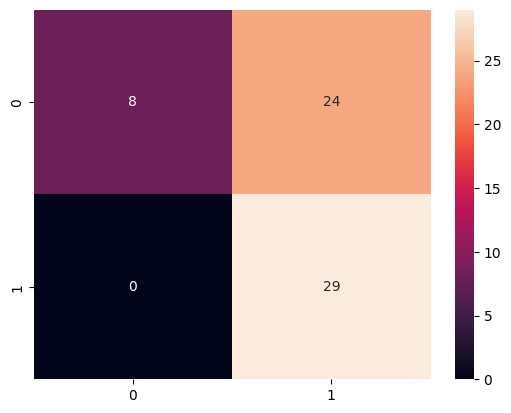

In [64]:
import seaborn as sns
sns.heatmap(cfMatrix,annot=True)